# [IAPR][iapr]: Project


**Group ID:** 32

**Author 1 (sciper):** Alexia Dormann (301997)
**Author 2 (sciper):** Valgerdur Jónsdóttir (351819)
**Author 3 (sciper):** Mariia Eremina (342236)

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/train2/train_00.png)

### Example puzzle content
Example of input of solved puzzles.
Solution 1
<img src="data_project/train2_solutions/solution_00_00.png" width="512"/>
Solution 2
<img src="data_project/train2_solutions/solution_00_01.png" width="512"/>
Solution 3
<img src="data_project/train2_solutions/solution_00_02.png" width="512"/>
Outlier 1
<img src="data_project/train2_solutions/outlier_00_00.png" width="128"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle, you are always expected to find exactly 9, 12, 16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 2.1. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 2.2 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [42]:
## import packages
from typing import Union
from glob import glob
import os
import matplotlib.pyplot as plt
import skimage.filters
import skimage.io
import pandas as pd
from sklearn.preprocessing import StandardScaler

import cv2
from PIL import Image
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path, folder ,filename )
    
    im= Image.open(os.path.join(path, folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


In [3]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
    return image_loaded , solved_puzzles , outlier_images

#im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

In [4]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
#im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

solving  6
solving  10


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## 4.1. Segmenting the puzzle pieces

To segment the images, we use an edge detection method. First, we try out our method for one image. Then, we will apply it to all images and save both the images with the segmentation lines around each puzzle piece and the extracted pieces from each input image in a folder.

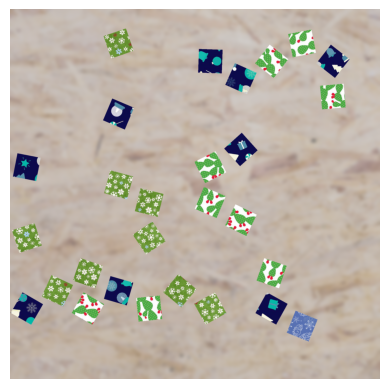

In [5]:
#Load image to explore 
img = skimage.io.imread('data_project/train2/train_02.png')

plt.imshow(img)
plt.axis('off')
plt.show()

We start by creating a function to segment the puzzle pieces, called `segment_pieces` (can be found in segmentation.py). We will use the following steps:
1. We preprocess the image using a median blur filter. This will remove noise and smoothen the image.
2. We find the edges of the image using the Canny edge detector.
3. We use mathematical morphology to dilate the edges to fill in the contours of the puzzle pieces. This makes the contours easier to detect.
4. We find the contours of the puzzle pieces, which represent the boundaries of the puzzle pieces.
5. A new blank image of the same size as the original image is created. For each contour found, the area inside the contour is filled with color in the new image.
6. Canny edge detection is applied to the new image to find the edges of the puzzle pieces.
7. For each contour found, a minimum area rectangle is fitted around the contour. This rectangle represents the bounding box of the puzzle piece.
8. We return two objects: the image with the segmentation lines drawn on it, and the contours of the puzzle pieces.


To extract the puzzle pieces from the image, we define a function called `extract_pieces`, which can also be found in the file segmentation.py. We use the following steps:
1. For each contour found, we find the minimum area rectangle that fits around the contour.
2. Create a new blank image of the same size as the original image, where the area inside the current contour is filled with white color and the rest is black.
3. Create a new image, piece, where the puzzle piece is extracted from the original image using the new blank image (everything outside the puzzle piece is black).
4. Rotate the puzzle piece around the center of the minimum area rectangle by the angle of the rectangle.
5. Crop the puzzle piece to remove the black borders and add it to the list of extracted pieces.
6. Return the list of extracted pieces.

In [6]:
from segmentation import segment_pieces, extract_pieces
from helper_functions import display_images_in_grid

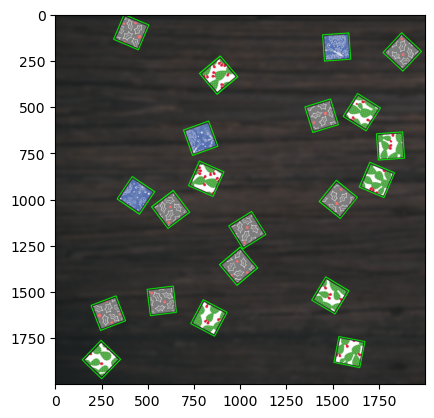

In [7]:
img = skimage.io.imread('data_project/train2/train_03.png')
seg, contours = segment_pieces(img)
plt.imshow(seg); plt.show()

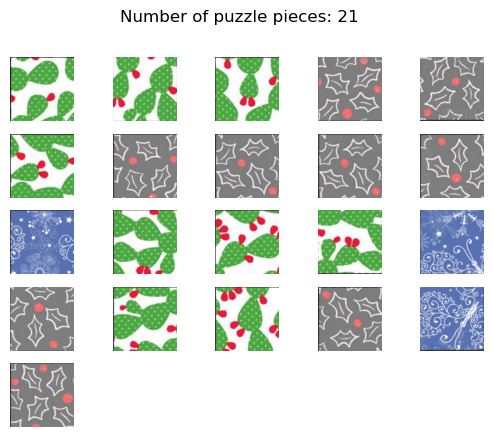

In [8]:
puzzles = extract_pieces(img, contours)
display_images_in_grid(puzzles)

In [8]:
from save_evaluation_files import save_mask
from segmentation import segment_pieces


image_directory = 'data_project/train2'
saving_path = 'data_project/train2_masks'
os.makedirs(saving_path, exist_ok=True)

image_filenames = sorted(os.listdir(image_directory))

for idx, image_filename in enumerate(image_filenames):
    image_path = os.path.join(image_directory, image_filename)
    image = cv2.imread(image_path)

    # Your segmentation function returns two values: an image with drawn lines and the contours
    seg_save, _ = segment_pieces(image, save_mask=True)

    # Save the segmented image
    save_mask(idx, seg_save, saving_path)

saving solutions in folder:  data_project/solutions_group_00

(384, 512, 3)

(384, 512, 3)

(384, 512, 3)

## 4.2. Extracting features of interest

The functions used in this section can be found in the file `feature_extraction.py`.

### Color features
Color histograms represent color distribution in an image. Thus, we can use them to describe the color of the puzzle pieces.  However, color histograms do not capture spatial information, so we need to keep in mind that two completely different images can have the same color histogram.

The following color features are computed from the color histogram of each puzzle piece:
1. Mean of color histogram.
2. Standard deviation of color histogram.
3. Average red color values of the image.
4. Average green color values of the image.
5. Average blue color values of the image.

Here below, we plot the color histogram of a puzzle piece that was extracted from the image above.

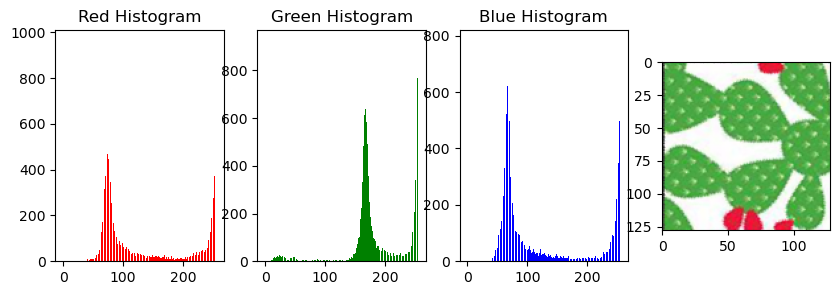

In [9]:
from helper_functions import plot_color_histogram

img_features = puzzles[11]
plot_color_histogram(img_features)

Now, we test our functions that extract the color features from the puzzle pieces. We use the function `mean_std_hist` to compute the mean and standard deviation of the color histogram, and the function `average_color` to compute the average red, green and blue color values of the image.

In [11]:
from feature_extraction import mean_std_hist, average_color

mean_hist, std_hist = mean_std_hist(img_features)
print('Mean of color histogram: ', mean_hist)
print('Standard deviation of color histogram: ', std_hist)

red_avg, green_avg, blue_avg = average_color(img_features)
print('Average red color values of the image: ', red_avg)
print('Average green color values of the image: ', green_avg)
print('Average blue color values of the image: ', blue_avg)

Mean of color histogram:  150.7426554361979
Standard deviation of color histogram:  74.69775931005863
Average red color values of the image:  138.6197509765625
Average green color values of the image:  187.6861572265625
Average blue color values of the image:  125.92205810546875


### Texture features
We can use Gabor filters to classify textures. Gabor filters are linear filters used for texture analysis, so they are able to analyze and understand the structural content or patterns in an image.

The Gabor filter is given with the following equation:
$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$

2D Gabor filters have rich applications in image processing, especially in feature extraction for texture analysis and segmentation. $f$ defines the frequency being looked for in the texture. By varying $\theta$, we can look for texture oriented in a particular direction. By varying $\sigma$, we change the size of the image region being analyzed.

The scale of a Gabor filter is determined primarily by the wavelength (λ) of the sinusoidal wave in the Gabor function and also by the standard deviation (σ) of the Gaussian function.

1. **Wavelength (λ):** This parameter determines the frequency of the sinusoidal part of the Gabor filter and thus defines the size of the structures (e.g., edges, lines) that the filter will respond to. For example, a Gabor filter with a small λ value will respond to high-frequency changes (small, finely detailed structures), while a filter with a large λ value will respond to low-frequency changes (large, coarse structures).

2. **Standard deviation (σ) of the Gaussian function:** This parameter controls the spatial extent of the Gabor filter (i.e., the size of the Gaussian window). A larger σ results in a larger filter size, which means the filter captures a larger area or scale in the image. Conversely, a smaller σ results in a smaller filter size, which captures a smaller area or scale in the image.

The following texture features will be extracted from the Gabor filter responses of each puzzle piece:
1. Mean of the filter responses.
2. Standard deviation of the filter responses.
3. Kurtosis of the filter respones. Kurtosis measures the "tailedness" of the distribution. High kurtosis might suggest the presence of strong edge-like or line-like features (which would generate high-magnitude responses from the Gabor filter), whereas a low kurtosis could indicate a more homogeneous or smooth texture.
4. From the Power spectrum of the filter responses, we can extract the following features:
    1. Mean power.
    2. Median power.
    3. Max power.
    4. Standard deviation of the power spectrum.
    4. Skewness of the power spectrum. Skewness measures the asymmetry of the distribution. A positive skewness indicates that the distribution is skewed right, whereas a negative skewness indicates that the distribution is skewed left.
    5. Kurtosis of the power spectrum.

As an example, we will plot the Gabor filter responses of a puzzle piece that was extracted from the image above. We define a Gabor filter bank, which is a collection of Gabor filters with different parameters. Then, we apply the Gabor filter bank to the image and plot the filtered images.

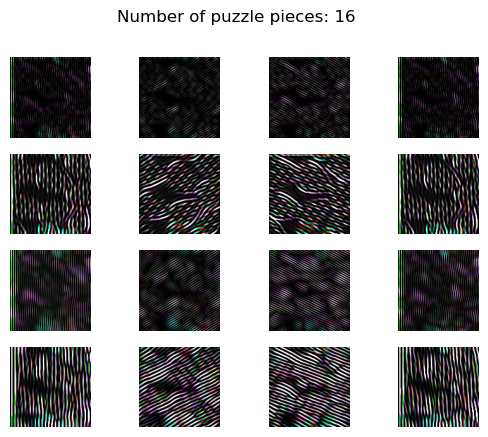

In [12]:
from feature_extraction import gabor_filter_bank, apply_gabor_filter_bank
# call the function to create a gabor filter bank
ksize = 31
sigmas = [3, 5]
lambdas = [3, 5]
thetas = [0, 45, 90, 135]
gabor_filter_bank_list = gabor_filter_bank(ksize, sigmas, lambdas, thetas)

# apply gabor filter and plot
filtered_images = apply_gabor_filter_bank(img_features, gabor_filter_bank_list)
display_images_in_grid(filtered_images)

To extract from the puzzle pieces all features, both color and texture, we define a function called `extract_features`. This function takes as input an image and returns a dictionary with all the features that we want to extract. The keys of the dictionary are the names of the features and the values are the values of the features.

In [13]:
from feature_extraction import extract_features

# extract features for each piece
features = [extract_features(x, gabor_filter_bank_list) for x in puzzles]
features = pd.DataFrame(features)

print('Number of puzzle pieces: ', len(features))
print('Number of features for each piece: ', len(features.columns))
features.head()

Number of puzzle pieces:  21
Number of features for each piece:  133


,mean_color,std_color,avg_red,avg_green,avg_blue,mean_gabor_1,mean_gabor_2,mean_gabor_3,mean_gabor_4,mean_gabor_5,...,kurtosis_power_7,kurtosis_power_8,kurtosis_power_9,kurtosis_power_10,kurtosis_power_11,kurtosis_power_12,kurtosis_power_13,kurtosis_power_14,kurtosis_power_15,kurtosis_power_16
0,0.004010,0.044012,161.476624,201.185547,152.950195,14.412048,14.240051,14.702209,13.930420,40.563599,...,1.448769,0.966862,2.429515,2.892763,2.956812,1.907623,1.791348,2.704071,2.283191,1.445609
1,0.004349,0.043980,153.516418,194.719482,140.038269,14.710449,16.256470,14.720276,14.247925,48.813049,...,1.626747,0.737047,2.320758,2.290595,2.481749,2.188546,1.321701,2.472150,2.368995,1.165282
2,0.004192,0.043995,156.800171,193.615967,143.501892,16.260986,12.384338,13.384705,15.708435,46.866272,...,1.568220,0.778341,2.871106,2.752580,2.616099,2.110025,1.482149,2.589934,2.546753,1.168511
3,0.003721,0.044037,145.372559,139.010193,139.338684,16.032532,15.222107,13.779480,16.018982,37.495239,...,1.756675,0.592504,2.396829,2.928260,2.420652,2.124579,1.238312,2.813580,2.352314,1.248582
4,0.003620,0.044046,142.210693,138.443481,138.709717,13.056030,16.583557,13.600708,12.807129,38.411072,...,1.782967,0.726882,2.553949,3.469017,2.252738,2.396837,1.399289,2.685261,2.269542,1.312347


In [14]:

#Define label manually
#y_true = [1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 3, 2]

### Feature selection

Since we have a lot of features, we need to select those that tells us the most about the puzzle pieces. We will use mutual information methods to do so:
- **PCA:** One way to perform feature selection is to use Principal Component Analysis (PCA). PCA is a dimensionality reduction technique that uses linear transformations to project the data into a lower-dimensional space. The idea is to find a new set of variables, called principal components, that are linear combinations of the original variables and that capture as much information as possible from the original variables. The first principal component captures the most information, the second principal component captures the second most information, and so on. We can then select the first $k$ principal components that capture the most information and use them as features.
- **Mutual information:** Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y. If the feature is independent of Y, then the mutual information is zero. If the feature is completely determined by Y, then the mutual information is high. In other words, mutual information measures how much knowing X reduces uncertainty about Y.

We start by extracting all features from all images in the training set.

In [53]:
from feature_extraction import extract_features_all_img

all_feat = extract_features_all_img('data_project/train2', gabor_filter_bank_list)
#all_feat = np.concatenate(all_feat)

In [ ]:
shape(all_feat)

#### 1. PCA

To determine the number of principal components to keep, we can plot the cumulative variance explained by the principal components and select the number of principal components that explain most of the variance. We can also use the "elbow method" to select the number of principal components. The idea is to select the number of principal components at the "elbow" of the plot, which is the point where the explained variance stops increasing rapidly.

The cumulative variance array shows the proportion of the total variance that is explained by the first principal component, the first two principal components, the first three principal components, and so on. It provides insights into how many principal components are needed to capture a desired amount of information or variance in the dataset.

The cumulative variance curve can help determine the optimal number of principal components to retain for dimensionality reduction or feature selection. By setting a threshold for the cumulative variance (e.g., 95% of the total variance), you can select the smallest number of principal components that capture a significant portion of the variance in the data.

In summary, cumulative variance provides a measure of the accumulated information explained by each principal component, while the explained variance ratio quantifies the contribution of each individual component to the total variance.

The elbow method is a common approach used to determine the suitable number of principal components (PCs) to retain in PCA. It involves plotting the cumulative explained variance as a function of the number of PCs and looking for a point on the plot where adding more PCs does not significantly increase the explained variance. This point is often referred to as the "elbow" and indicates a suitable number of PCs to retain.

Here's an example of how you can use the elbow method to determine the suitable number of PCs in PCA:

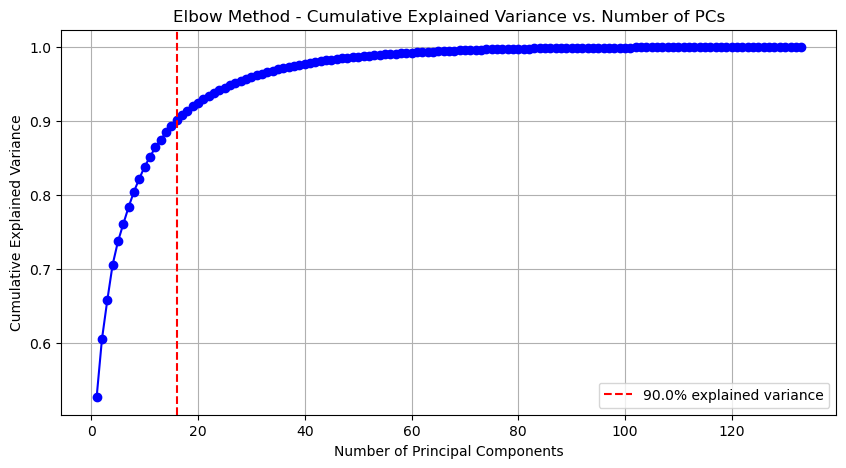

Number of selected features: 16


In [49]:
from feature_selection import perform_PCA_and_plot_explained_variance

# first we normalize the features to make them comparable
# convert all feat to pandas
features = pd.DataFrame(all_feat)
#features = all_feat.iloc[:, 0:55]

features_normalized = StandardScaler().fit_transform(features)
# select features using PCA
sel_features, principal_components, n_components = perform_PCA_and_plot_explained_variance(features_normalized, exp_variance=0.90)
print("Number of selected features:", n_components)

Now, we will extract the selected features from the feature matrix. We pick the first 16 principal components, which explain 90% of the variance. From the first 16 principal components, we select the 5 features with the highest absolute loadings. We repeat this process for all 16 principal components.

In [50]:
x_df = pd.DataFrame(all_feat)
loadings = pd.DataFrame(principal_components[:16], columns=x_df.columns)

# Identifying the features associated with the first n principal components
selected_features = []
for i in range(n_components):
    features_pc = loadings.iloc[i].abs().nlargest(5).index
    selected_features.extend(features_pc)
    print("Features belonging to Principal Component", i + 1, ":")
    print(features_pc)

selected_features = np.unique(selected_features)
print("Total number of selected features:", len(selected_features))
print("Indexes of selected features:")
print(selected_features)

Features belonging to Principal Component 1 :
Int64Index([69, 55, 80, 54, 71], dtype='int64')
Features belonging to Principal Component 2 :
Int64Index([97, 100, 33, 36, 25], dtype='int64')
Features belonging to Principal Component 3 :
Int64Index([120, 117, 124, 121, 0], dtype='int64')
Features belonging to Principal Component 4 :
Int64Index([90, 98, 99, 91, 105], dtype='int64')
Features belonging to Principal Component 5 :
Int64Index([102, 103, 126, 127, 111], dtype='int64')
Features belonging to Principal Component 6 :
Int64Index([122, 123, 106, 118, 125], dtype='int64')
Features belonging to Principal Component 7 :
Int64Index([112, 128, 109, 125, 101], dtype='int64')
Features belonging to Principal Component 8 :
Int64Index([119, 103, 47, 39, 127], dtype='int64')
Features belonging to Principal Component 9 :
Int64Index([130, 124, 114, 121, 115], dtype='int64')
Features belonging to Principal Component 10 :
Int64Index([3, 0, 1, 2, 99], dtype='int64')
Features belonging to Principal Com

Now, we extract the samples and corresponding indexing of features:

In [52]:
all_features_after_selection = x_df.iloc[:,selected_features]
print("Number of samples:", len(all_features_after_selection))
print("Number of features:", len(all_features_after_selection.columns))
all_features_after_selection.head()

Number of samples: 304
Number of features: 52


,0,1,2,3,4,25,33,36,37,39,...,121,122,123,124,125,126,127,128,130,131
0,0.906840,-0.869912,-1.146416,-1.149751,-1.155104,0.546925,0.369608,0.368135,-0.393492,-0.485232,...,-1.167419,-0.553275,-0.483218,-1.370108,-1.296713,-0.805179,-0.801285,-2.087353,1.334432,2.435712
1,-0.521675,0.531650,1.229764,1.216159,1.205361,0.344346,0.608944,0.623346,0.091564,-0.701251,...,-0.034649,0.790807,1.589590,-0.523821,0.826683,-0.657179,-0.355986,-0.239025,-0.232348,0.468746
2,1.297345,-1.280330,-1.182322,-1.190109,-1.196112,0.585426,0.287947,0.331145,-0.954752,-1.022768,...,-1.633091,-1.097709,-0.929563,-1.630254,-0.592952,0.283127,-0.585829,-1.146703,0.780683,1.203211
3,1.793065,-1.817213,0.254220,0.258214,0.259544,-1.002250,-1.058798,-1.055598,0.746414,2.504777,...,2.052827,-0.948956,-1.057554,2.987614,1.549855,0.229496,-0.089148,0.556301,1.073720,0.761985
4,0.850028,-0.811232,-1.194275,-1.183927,-1.179297,0.570784,0.296148,0.292292,-0.686225,-0.234598,...,-1.072850,-0.833378,-0.839934,-0.776357,-1.326726,-0.399604,-0.759861,-0.742329,1.206461,0.833782


# 4.3 Cluster puzzle pieces

In [488]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif, f_classif



In [489]:
y_true_puzzles = [[1, 1, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 2, 4, 3, 2, 3, 2],
                 [1,1,2,3,2, 1,1,2,2,1, 2,2,2,2,2, 1,1,1,3,1, 3],
                 [1,2,2,3,4,3, 4,3,4,4,2,4, 4,2,4,2,4,3, 2,3,3,2,3,3, 3,2,2,4],
                 [1,1,1,2,2, 1,2,2,2,2, 3,1,1,1,3, 2,1,1,2,3, 2],
                 [1,2,3,2,3, 2,3,2,2,2, 3,2,3,3,3, 2,1,3,2,3],
                 [1,2,2,3,3,2, 3,3,1,3,3,2, 1,2,1,3,1,1, 1,3,1,2,2,2, 3,4,1,2],
                 [1,2,1,2,2,1, 3,3,1,3,1,3 ,2,4,2,2,3,2, 1,3,4,2,3,2, 3,1,1,1,3],
                 [1,1,2,3,2,2, 4,1,3,1,3,3, 1,2,1,3,3,3, 2,1,3,3,2,1, 2,2,2,1],
                 [1,1,1,2,2,1, 1,2,1,2,2,1, 1,2,1,1,1,3, 1,2,1,1,2,1, 3,2],
                 [1,2,1,3,1,1, 1,4,2,2,1,2, 3,2,2,2,1,4, 2,4,4,2,1,4, 1,4,4,4],
                 [1,1,2,3,2,2, 3,3,1,2,2,3, 1,3,1,2,2,1, 1,3,1,2,1,2, 4,3,3,3],
                 [1,2,2,3,3, 2,2, 3,3,2, 3,2,3,3,2, 2,3,3,2]
                 ]

In [516]:
feat = [0, 1, 2, 3, 4, 25, 28, 29, 43, 52, 55, 69, 72, 73, 74, 75, 76, 83, 122, 123,
        35, 38, 39]

nb_cluster = [4,3,4,3,3,4,4,4,4,4,4,4]

# Iterate over all files in the directorys
precisions, clusters, pieces = [], [], []
for i, file_name in enumerate(os.listdir('data_project/train2')):
    if file_name.endswith('.png'):
        prec, pred, piece = segment_cluster_pieces('data_project/train2/' + file_name, nb_cluster[i], feat, y_true = y_true_puzzles[i])
        precisions.append(prec); clusters.append(pred); pieces.append(piece)
        
print(np.nanmean(np.concatenate(precisions)))

Precision for image data_project/train2/train_00.png[1. 1. 1. 1.]
Precision for image data_project/train2/train_01.png[1. 1. 1.]
[2 1 1 1 1 1 1 1 1 1]
Precision for image data_project/train2/train_02.png[ 1.  1.  1.  1. nan nan]
Precision for image data_project/train2/train_03.png[1. 1. 1.]
Precision for image data_project/train2/train_04.png[1. 1. 1.]
[2 2 1 1 2 2 2 2 1 2]
Precision for image data_project/train2/train_05.png[1.         0.77777778 1.         1.                nan]
Precision for image data_project/train2/train_06.png[1. 1. 1. 1.]
Precision for image data_project/train2/train_07.png[1. 1. 1. 1.]
[1 2 2 2 1 1 1 1 1 2 2 2 2 1 2 1 2]
Precision for image data_project/train2/train_08.png[0.53333333 1.         1.                nan]
Precision for image data_project/train2/train_09.png[1. 1. 1. 1.]
[1 1 1 1 1 1 2 1 1 1]
[1 1 1 1 1 1 1 1 1 2]
Precision for image data_project/train2/train_10.png[ 1.  1.  1.  1. nan nan nan]
Precision for image data_project/train2/train_11.png[1. 

[ 3  4  6  7  9 10 15 19 24]


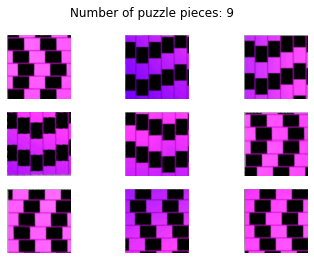

[ 0  8 12 14 16 17 18 20 26]


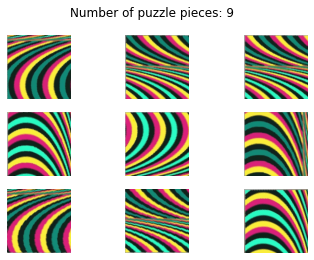

[ 5 11 25]


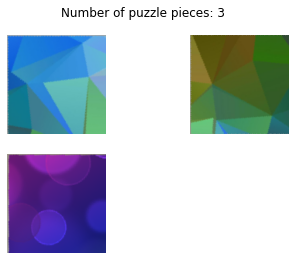

[ 1  2 13 21 22 23 27]


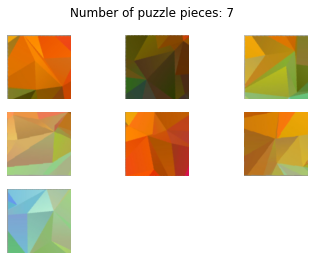

In [515]:
i = 5
for u in np.unique(clusters[i]):
    print(np.squeeze(np.argwhere(clusters[i] == u)))
    display_images_in_grid(np.array(pieces[i])[np.squeeze(np.argwhere(clusters[i] == u))])

# Unsupervised learning 

### 1. Approach : Affinity Propagation

**Result**:  define only the right second puzzle (all 9 samples belongs to one (2) class), the last 3 sample which belongs to the third puzzle assigned to the 3 and 4 class, and samples from the first puzzle were assigned to the 1 and 0 class.

**+** - already see some result 

**-** - hard to determine images which not belong to the puzzle

In [41]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation().fit(df)

clustering.labels_

array([0, 3, 3, 1, 1, 0, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 0, 3, 1, 2, 3],
      dtype=int64)

### 2. Approach : Agglomerative Clustering

**Result**:  define only the right sampels belong to third puzzle

In [35]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering()

# Fit the data and obtain the cluster labels
cluster_labels = clustering.fit_predict(df)

# Print the cluster labels
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0]


### 3. Approach :Gaussian Mixture

**Result**:  define all sampels right
**+** - define all sampels right

**-** - need prior knowledges about number of classes

In [36]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Create an instance of GaussianMixture
gmm = GaussianMixture(n_components=3)  # You can adjust the number of components

# Fit the data and obtain the cluster labels
cluster_labels = gmm.fit_predict(df)

# Print the cluster labels
print(cluster_labels)


[0 0 0 2 2 0 2 2 2 2 1 0 0 0 1 2 0 0 2 1 2]


### 4. Approach : K Means

**Result**:  define first puzzle samples right, confuse about 2 sampels which belongs to second and thirds class(were assigned vise versa)

**+** - define 90% sampels right

**-** - need prior knowledges about number of classes, still do mistake 

In [37]:
from sklearn.cluster import KMeans
import numpy as np

# Create an instance of KMeans
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters

# Fit the data and obtain the cluster labels
kmeans.fit(df)
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)


[0 0 0 1 1 0 1 1 1 1 1 0 0 0 2 1 0 0 1 2 1]


### 4.2 Approach: K Means without adjusting the number of classes


**Result**: were 7 classes but the first puzzle samples were assigned to 1,5,6 class, the second puzzle samples to 3 and 0, and the third puzzle sampels to 4,7,2

**+** - somehow right assigned (assigned classes do not overlapping) if possible to merge classes

**-** - need additional technique to merge classes

In [38]:
# Without adjusting number of classes
# Create an instance of KMeans
kmeans = KMeans()  # You can adjust the number of clusters

# Fit the data and obtain the cluster labels
kmeans.fit(df)
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)

[3 1 1 7 4 6 4 0 0 0 2 3 6 3 2 0 6 1 0 5 7]


### 5. Approach: Mean Shift clustering


**Result**: assigned first and second puzzles samples right, third one assigned one sample to additional class

**+** - works nice, right assigned 95% of samples 

**-** - need adjust bandwidth parameter

In [39]:
from sklearn.cluster import MeanShift

# Create an instance of Mean Shift
mean_shift = MeanShift(bandwidth=4)

# Perform clustering
labels = mean_shift.fit_predict(df)

labels

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 3, 0],
      dtype=int64)

### 5.1 Approach: Mean Shift clustering without adjust bandwidth parameter


**Result**: assigned first and second puzzles samples right, third one assigned one sample to additional class

**+** - works nice, right assigned 95% of samples 


In [40]:
from sklearn.cluster import MeanShift


# Create an instance of Mean Shift
mean_shift = MeanShift()

# Perform clustering
labels = mean_shift.fit_predict(df)

labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0],
      dtype=int64)

### 6. Approach: Spectral Clustering


**Result**: assigned all samples right

**+** - assigned all samples right

**-** - need adjust number of clusters

In [41]:
from sklearn.cluster import SpectralClustering


# Create an instance of Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)

# Perform clustering
labels = spectral_clustering.fit_predict(df)
labels

array([2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0])

# Find number of classes in data set as a prior knowledge for classification

### 1. Approach : Elbow method
    
**Result** : 3 classes
**-** - only visually can be detected


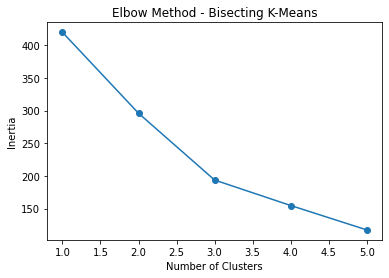

In [42]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Perform Bisecting K-Means with varying number of clusters
max_clusters = 5
inertias = []
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plot the inertia (within-cluster sum of squares) as a function of the number of clusters
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Bisecting K-Means')
plt.show()


### 2. Approach : Silhouette Score
    
**Result** : detect only 2 classes

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df
# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Perform K-Means with different numbers of clusters
silhouette_scores = []
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the optimal number of clusters with the highest Silhouette Score
optimal_num_clusters = np.argmax(silhouette_scores) + min_clusters

print("Optimal number of clusters:", optimal_num_clusters)


Optimal number of clusters: 2


### 3. Approach : Calinski-Harabasz Index
    
**Result** : too many classes

In [44]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Generate a synthetic dataset
X = df

# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Perform K-Means with different numbers of clusters
scores = []
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = calinski_harabasz_score(X, labels)
    scores.append(score)

# Find the optimal number of clusters with the highest Calinski-Harabasz score
optimal_num_clusters = np.argmax(scores) + min_clusters

print("Optimal number of clusters:", optimal_num_clusters)




Optimal number of clusters: 10


# 4. Approach : Dendrogram !!!
    
**Result** : Super! works and can use for classification directly. Looke at result below

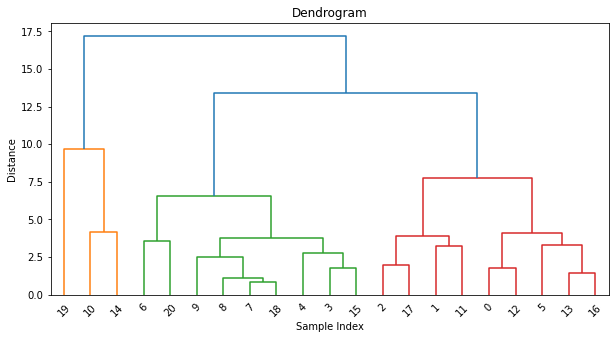

In [44]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X = df

# Perform hierarchical clustering
Z = linkage(X, method='ward')
pred = fcluster(Z, t= 3, criterion='maxclust')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix

M = confusion_matrix(y_true, pred)
np.max(M,axis=1)/np.sum(M,axis=1)

array([1., 1., 1.])